# **VENTADATAMINER**

Se trata de un conjunto de datos transaccionales que contiene
todas las transacciones ocurridas entre el 01/12/2010 y el
09/12/2011. Para un comercio minorista en línea sin tienda
física registrado y con sede en el Reino Unido.



Información Adicional: Se trata de un conjunto de datos transaccionales que
contiene todas las transacciones que se produjeron entre el 1 de Diciembre
de 2010 y el 9 de diciembre de 2011 para una empresa minorista en línea sin
establecimientos físicos registrada y con sede en el Reino Unido. La empresa
vende principalmente regalos exclusivos para cualquier ocasión.

# **Importación de librerias y carga de datos**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Cargar los datos
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
data = pd.read_excel(url)

# Ver las primeras filas del DataFrame
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


# **Limpieza de los datos**

In [2]:
# Eliminar filas con valores nulos en columnas críticas
data.dropna(subset=['InvoiceNo', 'Description', 'Quantity', 'UnitPrice'], inplace=True)
# Filtrar solo las transacciones positivas (ventas)
data = data[data['Quantity'] > 0]
# Convertir la columna 'InvoiceDate' a tipo datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
# Verificar los cambios
print(data.info())

<ipython-input-2-046650b5d662>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


<class 'pandas.core.frame.DataFrame'>
Index: 530693 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530693 non-null  object        
 1   StockCode    530693 non-null  object        
 2   Description  530693 non-null  object        
 3   Quantity     530693 non-null  int64         
 4   InvoiceDate  530693 non-null  datetime64[ns]
 5   UnitPrice    530693 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      530693 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.4+ MB
None


# **Pre-procesamiento**
1. Identificar los productos más vendidos
2. Analizar las tendencias de ventas a lo largo del tiempo
3. Evaluar el rendimiento por categoría de producto
4. Identificar patrones de compra por cliente
5. Analizar las tendencias de ventas a lo largo del tiempo
6. Evaluar el rendimiento por categoría de producto
7. Identificar patrones de compra por cliente

# 1. **Identificar los productos más vendidos**

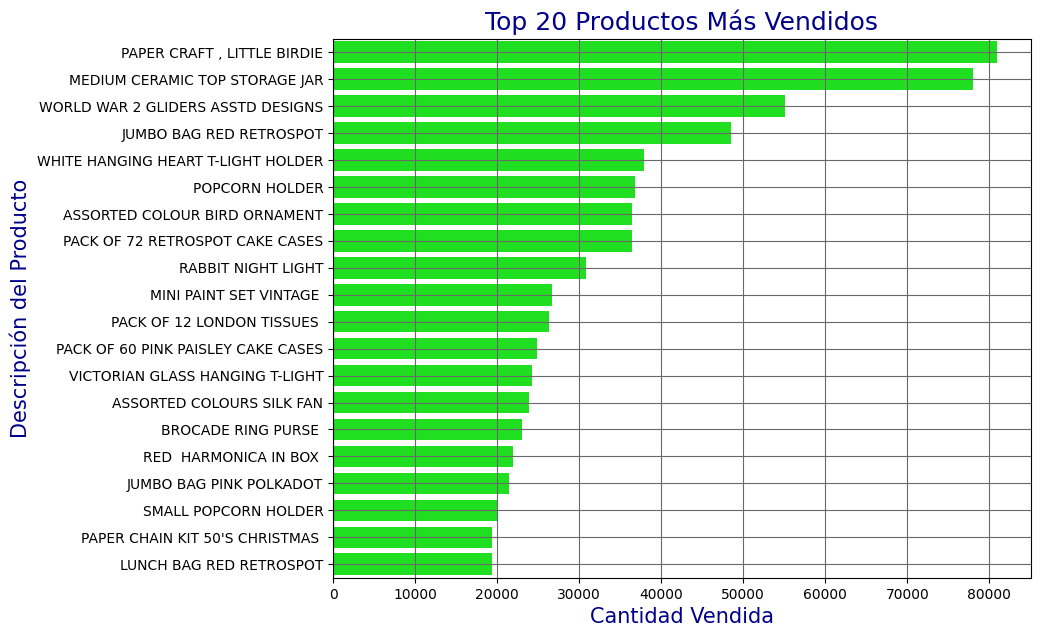

In [3]:
# Agrupar por 'Description' y sumar las 'Quantity'
products_sold = data.groupby('Description')['Quantity'].sum().reset_index()

# Ordenar los productos por cantidad vendida
top_products = products_sold.sort_values(by='Quantity', ascending=False).head(20)

# Visualizar los productos más vendidos
plt.figure(figsize=(9, 7))
sns.barplot(x='Quantity', y='Description', data=top_products, color= 'lime')
plt.title('Top 20 Productos Más Vendidos', color= 'darkblue', fontsize=18)
plt.xlabel('Cantidad Vendida',color= 'darkblue', fontsize=15)
plt.ylabel('Descripción del Producto', color= 'darkblue', fontsize=15)
plt.grid(color= 'dimgray')
plt.show()